![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Transições

# Parte 1: Newton

Vamos ver em um caso o que acontece para o método de Newton não convergir.

Comece com o método em si:

In [2]:
def newton_solve(f, df, y, x0, xtol=1e-8, ytol=1e-8, maxiter=100, full=False):
    """Newton's algorithm for solving  f(x) = y  starting from  x0.
    Also returns the number of evaluations of f.

    Se full=True, retorna a lista de todos os pontos gerados. (só usado a partir da 4a questão)"""

    x = x0
    pts = []
    for n in range(1,maxiter+1):
        fxn = f(x)-y
        Dfxn = df(x)
        pts.append(x)
        step = fxn/Dfxn
        newx = x - step

        if abs(f(newx)-y) < ytol:
            if newx > y:
                pts.append(abs(newx))
            if full == True:
                return pts
            return newx, n

        if abs(step) < xtol:
            if newx > y:
                pts.append(abs(newx))            
            if full == True:
                return pts
            return newx, n

        x = newx
    if full == True:
        return pts
    return x, n

## Questão 1: Vendo a transição

Faça o gráfico do número de iterações, em função do ponto inicial,
para encontrar a raiz do arco-tangente.

In [3]:
import warnings

#Antecepamos essa caixa de ignorar erros que virá logo abaixo pois esse primeiro gráfico também exibe tais mensagens de erro!
warnings.filterwarnings("ignore", message="divide by zero encountered in double_scalars")
warnings.filterwarnings("ignore", message="invalid value encountered in double_scalars")
warnings.filterwarnings("ignore", message="overflow encountered in double_scalars")

In [4]:
def cauchy(x):
    return 1/(1 + x**2)

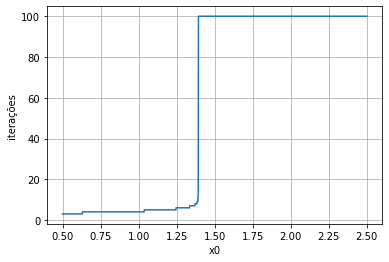

In [5]:
xs = np.linspace(0.5, 2.5, num=3000)

list = [newton_solve(np.arctan, cauchy, 0, x)[1] for x in xs]
plt.plot(xs, list)
plt.grid()
plt.ylabel('iterações')
plt.xlabel('x0')
ax = plt.gca();

In [6]:
assert len(ax.lines) == 1
assert ax.get_xlabel() != ""
assert ax.get_ylabel() != ""

In [7]:
ys = ax.lines[0].get_ydata()
assert 3 <= min(ys) <= 10
assert max(ys) == 100

In [8]:
ax = None

Refaça o gráfico, para destacar a transição

In [9]:
import warnings

# Senão vai ficar muito pesado...
warnings.filterwarnings("ignore", message="divide by zero encountered in double_scalars")
warnings.filterwarnings("ignore", message="invalid value encountered in double_scalars")
warnings.filterwarnings("ignore", message="overflow encountered in double_scalars")

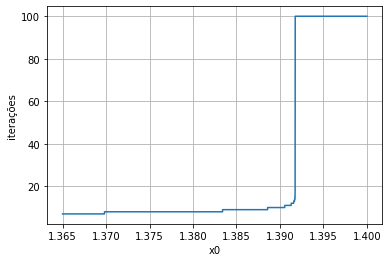

In [10]:
xs = np.linspace(1.365, 1.4, num=30000)

lista = [newton_solve(np.arctan, cauchy, 0, x)[1] for x in xs]
plt.plot(xs, lista)
plt.grid()
plt.ylabel('iterações')
plt.xlabel('x0')
ax = plt.gca()

In [11]:
assert len(ax.lines) == 1
xs = ax.lines[0].get_xdata()
ys = ax.lines[0].get_ydata()
assert max(xs) - min(xs) <= 0.25
assert 3 <= min(ys) <= 10
assert max(ys) == 100

In [12]:
ax = None

Porque os `assert`s acima garantem o destaque?

Pois existe um assert que verifica se o tamanho do intervalo observado é menor ou igual que 0.25 (o que garante que estamos observando a transição com uma certa "proximidade") e, existem 2 outros asserts que verificam se o ponto máximo é 100, e se o ponto mínimo está entre 3 e 10, o que garante que de fato a transição está presente no intervalo observado. 

## Questão 2: Calculando a transição

Use o método da bisseção para calcular
- o último valor (`float` do python) de $x_0$ para o qual o método de Newton encontra a raiz do arco tangente; e (ao mesmo tempo)
- o primeiro valor de $x_0$ para o qual o método não encontra a raiz.

Chame-os de `a` e `b`.

In [13]:
def bissecao_pts(f, y, a, b, xtol=1e-16, maxiter=1000):
    """
    Encontra uma raiz de  f  pelo algoritmo da bissecao, retornando
    todos os pontos pelos quais o algoritmo passa.
    """
    niter = 0
    ncalls = 0
    x_pts = []
    while abs(a-b) > xtol:
        if niter == maxiter:
            return x_pts[-1]

        niter += 1
        ncalls += 2
        m = (a+b)/2

        if f(m) != f(m) or f(m) > y + 1e-8:
            b = m
            x_pts.append((a,b))
        elif f(m) == f(m) or f(m) > y - 1e-8:
            a = m
            x_pts.append((a,b))
    return x_pts[-1]

In [14]:
def func(x):
    return newton_solve(np.arctan, cauchy, 0, x)[0]

a, b = bissecao_pts(func, 0, 0, 2)

In [15]:
r, n = newton_solve(np.arctan, cauchy, 0, a, maxiter=100)
assert np.abs(r) < 1e-8
assert 30 < n < 100

In [16]:
r, n = newton_solve(np.arctan, cauchy, 0, b, maxiter=1000)
assert np.abs(r) > 1e-1
assert n == 1000

In [17]:
assert 0 < b-a < 3e-16

## Questão 3: Um gráfico mais preciso

Faça o gráfico do número de iterações para vários pontos "até chegar em $a$".
Pense nas escalas, e também em como "se aproximar de $a$".

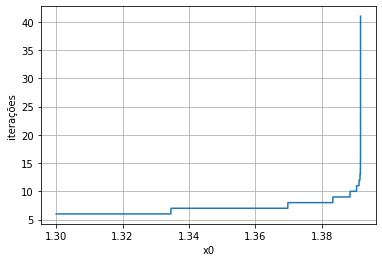

In [18]:
xs = np.linspace(1.3, a, num=30000)

list = [newton_solve(np.arctan, cauchy, 0, x)[1] for x in xs]
plt.plot(xs, list)
plt.grid()
plt.ylabel('iterações')
plt.xlabel('x0')
ax = plt.gca();

In [19]:
assert len(ax.lines) == 1
assert ax.get_xlabel() != ""
assert ax.get_ylabel() != ""

ys = ax.lines[0].get_ydata()
assert 3 <= min(ys) <= 10
assert 40 < max(ys) < 60

In [20]:
ax = None

Quão rápido (ou devagar) o método de Newton para de funcionar ao se aproximar de $a$?

Conforme o método de newton vai se aproximando do ponto __a__, vai havendo um crescimento do número de iterações cada vez mais rápido, quase como o comportamento da exponencial.

O que acontece com o método de Newton no ponto $b$?
Faça as contas (ou gráfico(s)) abaixo, e explique em seguida

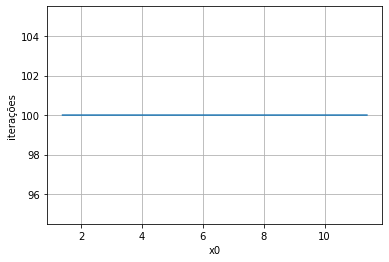

In [21]:
xs = np.linspace(b, b+10, num=3000)

list = [newton_solve(np.arctan, cauchy, 0, x)[1] for x in xs]
plt.plot(xs, list)
plt.grid()
plt.ylabel('iterações')
plt.xlabel('x0')
ax = plt.gca();

A partir do ponto __b__, o método de newton não consegue mais convergir para uma raiz, isso ocorre com todos os valores que estão depois deste ponto, o gráfico acima demonstra uma parte desse resultado utilizando como exemplo xs sendo intervalo [b, b+10].

## Questão 4: Encontrando outras raízes

Vamos ver o que acontece quando, em vez de zero, queremos resolver $\arctan(x) = y$, para outros valores de $y$.

In [22]:
def transição(f, df, y, a, b):
    """Encontra uma transição do método de Newton para resolver  f(x) = y  no intervalo [a,b].
    Retorna o par de pontos limite."""

    def fun(x):
        return newton_solve(f, df, y, x)[0]

    def biss_solve2(f1,f2, y, a, b, xtol, ni=500):
        """Bissects the interval  [a,b]  until an approximate solution to  f(x) = y  is found.
        Also returns the number of bissections"""
        #k = biss_solve(f2, y, a, b)
        pts_a = [a]
        pts_b = [b]
        #print(f1(a),f1(b))
        z = 0
        while (f1(a) == f1(a) and f1(b) != f1(b)) or (f1(a) != f1(a) and f1(b) == f1(b)):
            z+=1
            m = (a+b)/2
            x = f1(m)

            if x != x :
                b = m
                pts_b.append(b)

            else:
                a = m
                pts_a.append(a)
            #print(abs(a-b))
            if z == ni: return np.pi, 1
            if abs(a-b) < xtol: break

        return pts_a[-1], pts_b[-1]

    xs = np.linspace(3e-16,1e-15,8)
    #print(xs)
    for i in xs:
        a1, b1 = biss_solve2(fun,f, y, a, b, i)
        if a1 != np.pi:
            return a1, b1

In [23]:
def transição2(f, df, y, a, b):
    """Encontra uma transição do método de Newton para resolver  f(x) = y  no intervalo [a,b].
    Retorna o par de pontos limite."""

    def fun(x):
        return newton_solve(f, df, y, x)[0]

    def biss_solve2(f1,f2, y, a, b, xtol=3e-16):
        """Bissects the interval  [a,b]  until an approximate solution to  f(x) = y  is found.
        Also returns the number of bissections"""
        #k = biss_solve(f2, y, a, b)
        pts_a = [a]
        pts_b = [b]
        #print(f1(a),f1(b))
        while (f1(a) == f1(a) and f1(b) != f1(b)) or (f1(a) != f1(a) and f1(b) == f1(b)):
            m = (a+b)/2
            x = f1(m)

            if x != x :
                b = m
                pts_b.append(b)

            else:
                a = m
                pts_a.append(a)
            #print(abs(a-b))
            if abs(a-b) < xtol: break

        return pts_a[-1], pts_b[-1]


    return biss_solve2(fun,f, y, a, b)

In [24]:
# Deveria reproduzir os resultados da parte anterior
a, b = transição(np.arctan, cauchy, 0, 0, 2)
assert 0 < b-a < 3e-16

In [25]:
# Agora, tentando achar outra raiz
a, b = transição(np.arctan, cauchy, 0.1, 0, 4)
assert 0 < b-a < 3e-16

In [26]:
xsol, niters = newton_solve(np.arctan, cauchy, 0.1, a)
assert np.isclose(np.arctan(xsol), 0.1)

xsol, niters = newton_solve(np.arctan, cauchy, 0.1, b)
assert niters == 100

In [27]:
# Transição para uma raiz ainda mais longe
a, b = transição(np.arctan, cauchy, 1, 0, 4)
assert 0 < b-a < 5e-16

## Questão 5: Iterações perto da transição

Quais são os 20 primeiros valores gerados a partir de $a$, ao resolver $\arctan(x) = 1$?
E $b$?
Faça um gráfico, para comparar.

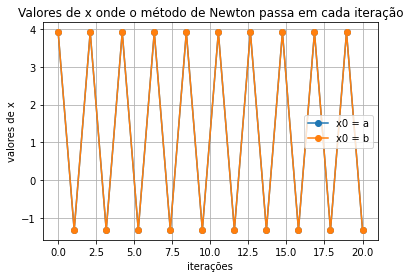

In [28]:
ys_a = newton_solve(np.arctan, cauchy, 1, a, full=True)[:20]
ys_b = newton_solve(np.arctan, cauchy, 1, b, full=True)[:20]
xs = np.linspace(0,20, num=20)

plt.plot(xs, ys_a, label='x0 = a', marker='o')
plt.plot(xs, ys_b, label='x0 = b', marker='o')
plt.legend()
plt.grid()
plt.title('Valores de x onde o método de Newton passa em cada iteração')
plt.xlabel('iterações')
plt.ylabel('valores de x')

ax = plt.gca();

In [29]:
assert len(ax.lines) == 2
assert ax.get_title() != ""
assert ax.get_xlabel() != ""

In [30]:
for l in ax.lines:
    xs = l.get_xdata()
    ys = l.get_ydata()
    assert 0 == min(xs)
    assert max(xs) >= 19
    assert  3.5 <= max(ys) <= 4
    assert -1.5 <= min(ys) <= -1

In [31]:
ax = None

Faça um gráfico (usando os 20 pontos gerados a partir de $a$ e $b$) que ajude a ver porque esses métodos estão dando resultados diferentes

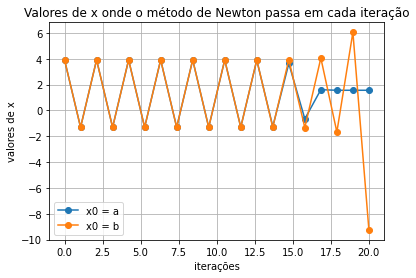

In [32]:
ys_a = newton_solve(np.arctan, cauchy, 1, a, full=True)[12:]
ys_b = newton_solve(np.arctan, cauchy, 1, b, full=True)[10:30]
xs = np.linspace(0,20, num=20)

plt.plot(xs, ys_a, label='x0 = a', marker='o')
plt.plot(xs, ys_b, label='x0 = b', marker='o')
plt.legend()
plt.grid()
plt.title('Valores de x onde o método de Newton passa em cada iteração')
plt.xlabel('iterações')
plt.ylabel('valores de x')

ax = plt.gca();

O que este gráfico mostra?
Porque ajuda a entender o comportamento perto de $a$ e $b$?

Pois mostra que usando __a__ como pto inicial o método converge pra um certo valor de x, porém, utilizando __b__ o método começa a divergir com o passar das iterações.

Faça o gráfico dos 10 pontos **seguintes** para cada um dos casos, no mesmo eixo.
Use o recorte em $y$ indicado.

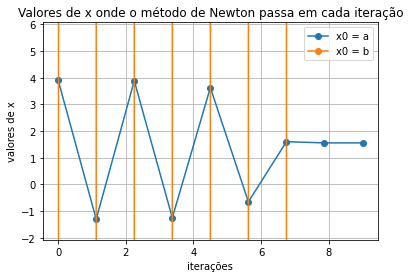

In [33]:
ys_a = newton_solve(np.arctan, cauchy, 1, a, full=True)[22:31]
ys_b = newton_solve(np.arctan, cauchy, 1, b, full=True)[30:39]
xs = np.linspace(0,9, num=9)

plt.plot(xs, ys_a, label='x0 = a', marker='o')
plt.plot(xs, ys_b, label='x0 = b', marker='o')
plt.legend()
plt.grid()
plt.title('Valores de x onde o método de Newton passa em cada iteração')
plt.xlabel('iterações')
plt.ylabel('valores de x')

ax = plt.gca()
ax.set_ylim([-2.08,6.08]);

In [34]:
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2

In [35]:
for l in ax.lines:
    xs = l.get_xdata()
    ys = l.get_ydata()
    assert 0 == min(xs)
    assert 9 == max(xs)

Esse caso é ligeiramente diferente do anterior no comportamento das iterações a partir de $b$.
É um problema de precisão: se houvesse mais números entre $a$ e $b$, seria possível ver o mesmo comportamento.

Explique porquê.

Pois como dito anteriormente o método de Newton utilizando como ponto de partida __b__, começa a divergir cada vez mais. Com isso ao passo que vão sendo feitas iterações, o algoritmo vai passando por mais pontos de x (que estão cada vez mais distante um do outro), o que gera esses enormes saltos à cada iteração, o que não ocorreria se houvessem mais números entre __a__ e __b__, pois a divergência seria mais lenta.

# Parte 2: Autovalores e Autovetores

## Questão 6: O maior autovalor

Dê, abaixo, o código para calcular o maior autovalor de uma matriz $A$, começando a partir do vetor $v$:

In [36]:
def max_ev(A, v, tol=1e-8):
    """Iteração de potência para encontrar Au = lu, com o maior autovalor em módulo de uma matriz.
    Retorna par (autovalor, autovetor), e o número de iterações"""
    n, m = np.shape(A)
    assert n == m
    niters = 0
    l = 1

    while True:
        u = np.dot(A,v)
        v = u / np.linalg.norm(u)
        l = np.dot(A@v,v)/np.dot(v,v)
        niters += 1
        if np.linalg.norm(A@v-l*v) < tol: break

    return v, l, niters

In [37]:
A = [[1, 2], [2, 3]]
u, l, niters = max_ev(A, [1,1])
assert l > 4
assert np.allclose(A@u, l*u)
assert 4 < niters < 8

In [38]:
A = [[1, 2], [2, 3]]
u, l, niters = max_ev(A, [1,1], tol=1e-13)
assert l > 4
assert np.allclose(A@u, l*u, atol=1e-12, rtol=1e-12)
assert 8 < niters < 12

In [39]:
np.random.seed(7)
A = np.random.randn(7,7)
A += A.T
u, l, niters = max_ev(A, np.ones(7))
assert np.allclose(A@u, l*u)
assert 150 < niters < 250

In [40]:
np.random.seed(7)
A = np.random.randn(7,7)
A += A.T
u, l, niters = max_ev(A, np.ones(7), tol=1e-12)
assert np.allclose(A@u, l*u, atol=1e-11, rtol=1e-11)
assert 250 < niters < 350

## Questão 7: Variando o vetor inicial

Em $R^2$, podemos variar o vetor inicial dando um ângulo entre $0$ e $2\pi$.
Faça o gráfico do número de iterações necessárias para atingir precisão $10^{-12}$, em função do ângulo.

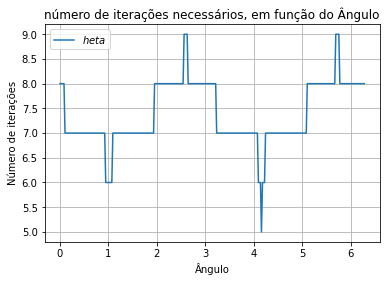

In [41]:
A = [[1, 2], [2,3]]
thetas = np.linspace(0, 2*np.pi, num=300)

ns=[max_ev(A, [np.cos(theta), np.sin(theta)])[2] for theta in thetas]

plt.plot(thetas,ns, label='$\theta$')

plt.title('número de iterações necessários, em função do Ângulo')

plt.xlabel('Ângulo')
plt.ylabel('Número de iterações')
plt.legend(loc='best')

plt.grid(True, which='both')
ax = plt.gca();

In [42]:
assert len(ax.lines) == 1
assert ax.get_xlabel() != ""
assert ax.get_ylabel() != ""

In [43]:
ax = None

O que você observa no gráfico?

Que de acordo com o ângulo do vetor __v__ inicial, o número de iterações necessárias para se obter uma certa precisão vai variando de forma periódica!

## Questão 8: Menos iterações

Faça um "zoom" numa vizinhança do ângulo com menos interações.

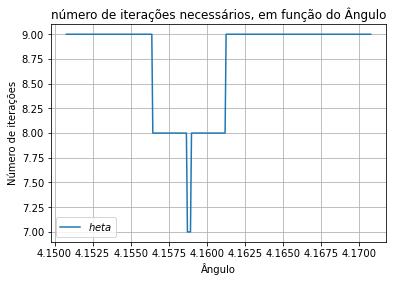

In [44]:
angulo = thetas[ns.index(min(ns))]

A = [[1, 2], [2,3]]
thetas = np.linspace(angulo-0.01, angulo+0.01, num=300)

ns=[max_ev(A, [np.cos(theta), np.sin(theta)], tol=1e-12)[2] for theta in thetas]

plt.plot(thetas,ns, label='$\theta$')

plt.title('número de iterações necessários, em função do Ângulo')

plt.xlabel('Ângulo')
plt.ylabel('Número de iterações')
plt.legend(loc='best')

plt.grid(True, which='both')
ax = plt.gca()

In [45]:
assert len(ax.lines) == 1

xs = ax.lines[0].get_xdata()
assert max(xs) - min(xs) <= 0.1

ys = ax.lines[0].get_ydata()
assert max(ys) < 10
assert min(ys) < 8

Como calcular um ângulo com menos iterações ainda?
Explique na caixa abaixo, e em seguida calcule $\theta_\text{min}$.

Dica: Veja a função `np.arctan2`.

Com o autovetor aproximado $v$ obtido pelo método de iteração de potência.   
Onde $v=(v_0,v_1)$ é aproximadamente $(\cos \theta, \sin \theta)$    
podemos achar $𝜃=\arctan(v_1/v_0)=$ `np.arctan2(v[1],v[0])`.

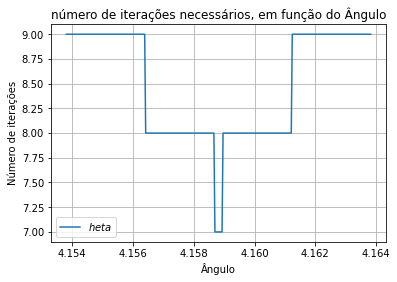

In [46]:
v = [np.cos(angulo), np.sin(angulo)]

A = [[1, 2], [2,3]]

v2 = max_ev(A, v, tol=1e-12)[0]

theta_min = 2*np.pi + np.arctan2(v2[1],v2[0])


thetas = np.linspace(theta_min-0.005, theta_min+0.005, num=300)

ns=[max_ev(A, [np.cos(theta), np.sin(theta)], tol=1e-12)[2] for theta in thetas]

plt.plot(thetas,ns, label='$\theta$')

plt.title('número de iterações necessários, em função do Ângulo')

plt.xlabel('Ângulo')
plt.ylabel('Número de iterações')
plt.legend(loc='best')

plt.grid(True, which='both')
ax = plt.gca()

Com isso, faça um gráfico mostrando todos os números de iteração menores do que 8 que você conseguir.

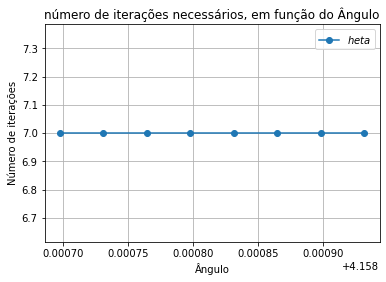

In [47]:
ns2 = []
thetas2 = []

for i in range(len(ns)) :
    if ns[i] < 8 : 
        ns2.append(ns[i])
        thetas2.append(thetas[i])

plt.plot(thetas2,ns2, marker='o', label='$\theta$')

plt.title('número de iterações necessários, em função do Ângulo')

plt.xlabel('Ângulo')
plt.ylabel('Número de iterações')
plt.legend(loc='best')

plt.grid(True, which='both')
ax = plt.gca()

O que você observa no gráfico acima?

Que apenas utilizando vetores iniciais com os ângulos presente no eixo x do gráfico acima, é possível se chegar a um resultado em menos de 8 iterações. Podemos também observar que o ângulo de abertura bem pequeno, o indica alta precisão.

O que este gráfico tem a ver com a velocidade de convergência do método?

A velocidade de convergência é inversamente proporcional ao número de iterações.

Portanto neste intervalo que o número de iterações é o menor possível, a velocidade de convergência é máxima.

## Questão 9: Mais iterações

Como calcular o ângulo correspondente ao maior número de iterações?
Explique abaixo, e calcule em seguida.

O ângulo $\theta_{max}$. correspondente ao maior número de iterações 
é um dos 2 ângulos perpendiculares (ortogonais) ao ângulo   
corrsepoendente ao menor número de iterações $\theta_{min}$.

Ou $\theta_{min}+\pi/2$ ou $\theta_{min}-\pi/2$

Para sabermos qual é a opção correta testamos o algoritmo de Iteração de potência   
em ambos para achar qual tem o maior número de iterações.




In [48]:
theta1 = theta_min +np.pi/2
v1 = [np.cos(theta1),np.cos(theta1)]

theta2 = theta_min -np.pi/2
v2 = [np.cos(theta2),np.cos(theta2)]


if max_ev(A, v1, tol=1e-12)[2] > max_ev(A, v2, tol=1e-12)[2] :
    theta_max = theta1
else :
    theta_max = theta2

print(theta_max)

2.5880182946929295


Faça, então, um gráfico mostrando, pelo menos, desde 12 até o maior número possível de iterações.

Obs: uma forma de aumentar o número de iterações é reduzir a tolerância.
Só não tente ser "preciso demais", pois isso pode acabar sendo mais do que a precisão do computador,
e daí a iteração nunca mais pára.

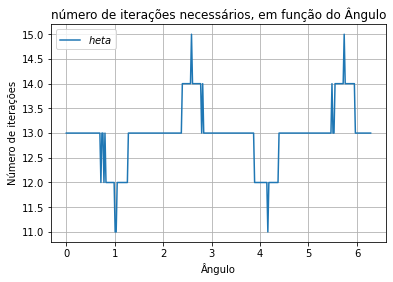

In [49]:
A = [[1, 2], [2,3]]
thetas = np.linspace(0, 2*np.pi, num=300)

ns=[max_ev(A, [np.cos(theta), np.sin(theta)], tol=1e-15)[2] for theta in thetas]

plt.plot(thetas,ns, label='$\theta$')

plt.title('número de iterações necessários, em função do Ângulo')

plt.xlabel('Ângulo')
plt.ylabel('Número de iterações')
plt.legend(loc='best')

plt.grid(True, which='both')
ax = plt.gca();

## Questão 10: Aplicação de iteração

Programe a função $h : [-\pi, \pi] \mapsto [-\pi, \pi]$ que, a um ângulo $\theta$,
associa o ângulo do vetor $Av$, onde $v$ tem ângulo $\theta$.

In [50]:
def h(A, theta):
    m, n = np.shape(A)
    assert m == n == 2
    u = np.array([np.cos(theta),np.sin(theta)])
    vec = np.dot(A,u)
    vec /= np.linalg.norm(vec)
    return np.arctan2(vec[1],vec[0])

In [51]:
assert h(A, 1) > 1

In [52]:
assert h(A, 2) < 2

In [53]:
assert h(A, -2) < -2

Qual a imagem do intervalo $I_0 = [0, \pi/2]$ por esta aplicação?

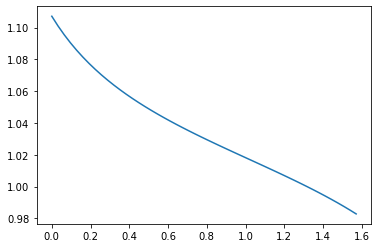

In [54]:
ixs = np.linspace(0,np.pi/2,50)
imag = [h(A, i) for i in ixs]
plt.plot(ixs,imag)

Agora, faça um gráfico do comprimento da imagem dos intervalos $I_n = h(I_{n-1})$, em função de $n$.

1.0172219678978498 1.0172219678978518


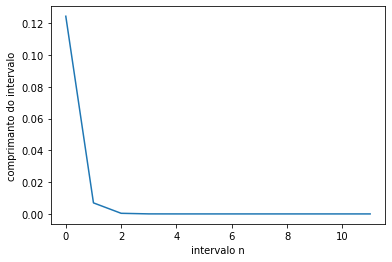

In [55]:
li = range(12)
lf =[]
ixs = np.linspace(0,np.pi/2,50)
for j in li:
    ixs2 = [h(A, i) for i in ixs]
    comp = max(ixs2)-min(ixs2)
    lf.append(comp)
    ixs = ixs2
la = ixs
print(la[0],la[-1])
plt.plot(li,lf)
plt.xlabel('intervalo n')
plt.ylabel('comprimanto do intervalo')

ax = plt.gca()

In [56]:
assert len(ax.lines) == 1
assert ax.get_xlabel() != ""
assert ax.get_ylabel() != ""

Enfim, faça um gráfico de $h$, no intervalo $[-\pi, \pi]$.

Trace, também, a diagonal $y = x$.

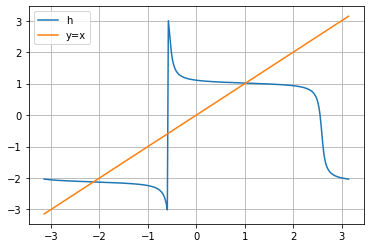

In [57]:
thetas = np.linspace(-np.pi, np.pi, num=300)
ixs2 = [h(A, i) for i in thetas]
#print(ixs2[0],ixs2[-1])
plt.plot(thetas,ixs2,label='h')
plt.plot(thetas,thetas,label='y=x')
plt.legend()
plt.grid()
ax = plt.gca()

In [58]:
assert len(ax.lines) == 2
assert len(ax.get_legend().texts) == 2

In [59]:
for l in ax.lines:
    xs = l.get_xdata()
    ys = l.get_ydata()
    assert np.isclose(min(xs), -np.pi)
    assert np.isclose(max(xs),  np.pi)
    assert np.isclose(min(ys), -np.pi, rtol=1e-1)
    assert np.isclose(max(ys),  np.pi, rtol=1e-1)

Como esse gráfico ajuda a explicar as questões anteriores?

Podemos observar claramente que, os pontos de interseção entre as funções no gráfico indicam os ângulos dos autovetores!
Como os vetores $Au$ são normalizados dentro da função $h$, os pontos do gráfico $h(A,\theta) = \theta$, nos mostra os vetores onde $v = (\cos(\theta),\sin(\theta))$ é um possível autovetor de $A$. Como a funçao $f(x) = x$ corta o gráfico de $h$ em $3$ pontos, e usamos uma matriz $2x2$, provavelmente os pontos representam vetores $v_1 = -v_2$. Por isso, o segundo gráfico da quêstão 10 converge para 0, pois o algorítimo da respectiva quẽstao é aplicado no intervalo $(0,\pi/2)$ convergindo para o valor abaixo.

In [60]:
print(la[0],la[-1])

1.0172219678978498 1.0172219678978518
